In [1]:
# importing libraries
import numpy as np
import astropy.io.fits as fits
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
plt.rcParams.update({
    'axes.titlesize': 14,     # Title font size
    'axes.labelsize': 14,     # X and Y axis labels font size
    'xtick.labelsize': 12,    # X tick labels font size
    'ytick.labelsize': 12,    # Y tick labels font size
    'legend.fontsize': 14,    # Legend font size
    'figure.titlesize': 14    # Figure title font size
})


# Load and explore the data

In [2]:
# opening the parameters file
masterall = fits.open('mastar-goodstars-v3_1_1-v1_7_7-params-v2.fits')[1]

In [3]:
masterall.header

XTENSION= 'BINTABLE'           /Binary table written by MWRFITS v1.11           
BITPIX  =                    8 /Required value                                  
NAXIS   =                    2 /Required value                                  
NAXIS1  =                  324 /Number of bytes per row                         
NAXIS2  =                24290 /Number of rows                                  
PCOUNT  =                    0 /Normally 0 (no varying arrays)                  
GCOUNT  =                    1 /Required value                                  
TFIELDS =                   73 /Number of columns in table                      
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
COMMENT                                                                         
COMMENT  *** Column names **

In [4]:
# opening the spectra file and accessing the data
goodspec = fits.open('mastar-goodspec-v3_1_1-v1_7_7.fits')[1]

In [5]:
goodspec.header

XTENSION= 'BINTABLE'           /Binary table written by MWRFITS v1.11           
BITPIX  =                    8 /Required value                                  
NAXIS   =                    2 /Required value                                  
NAXIS1  =               127936 /Number of bytes per row                         
NAXIS2  =                59266 /Number of rows                                  
PCOUNT  =                    0 /Normally 0 (no varying arrays)                  
GCOUNT  =                    1 /Required value                                  
TFIELDS =                   37 /Number of columns in table                      
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
COMMENT                                                                         
COMMENT  *** Column names **

In [6]:
# getting columns of interest
manga_id = masterall.data['MANGAID']
teff = masterall.data['TEFF_MED']
logg = masterall.data['LOGG_MED']
feh = masterall.data['FEH_MED']
teff_err = masterall.data['TEFF_MED_ERR']
logg_err = masterall.data['LOGG_MED_ERR']
feh_err = masterall.data['FEH_MED_ERR']


# creating a dataframe
mastarall_df = pd.DataFrame([manga_id, teff, teff_err, logg, logg_err, feh, feh_err]).T
mastarall_df.columns = ['manga_id', 'teff', 'teff_err', 'logg', 'logg_err', 'feh', 'feh_err'] # renaming columns

In [7]:
mastarall_df['teff'] = pd.to_numeric(mastarall_df['teff'])
mastarall_df['logg'] = pd.to_numeric(mastarall_df['logg'])
mastarall_df['feh'] = pd.to_numeric(mastarall_df['feh'])
mastarall_df['teff_err'] = pd.to_numeric(mastarall_df['teff_err'])
mastarall_df['logg_err'] = pd.to_numeric(mastarall_df['logg_err'])
mastarall_df['feh_err'] = pd.to_numeric(mastarall_df['feh_err'])

mastarall_df.describe() # print some stats

,teff,teff_err,logg,logg_err,feh,feh_err
count,24290.000000,24290.000000,24290.000000,24290.000000,24290.000000,24290.000000
mean,5873.278626,171.691747,-1.352912,-5.014700,-5.984892,-5.001374
std,2333.505748,674.797525,72.623591,72.348304,72.279911,72.349292
min,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,4862.615234,81.057367,4.042310,0.177444,-1.183262,0.177380
50%,5979.611816,103.511848,4.373149,0.228724,-0.581334,0.235501
75%,6275.876465,139.076653,4.525595,0.294101,-0.288633,0.302943
max,31000.000000,23480.347656,5.283726,3.325605,1.000000,2.076599


In [8]:
mastar_df = mastarall_df[(mastarall_df['teff'] > 0)] # drop stars with unknown temperatures
mastar_df.reset_index(drop=True, inplace=True)
mastar_df.describe() # print some stats

,teff,teff_err,logg,logg_err,feh,feh_err
count,24162.000000,24162.000000,24162.000000,24162.000000,24162.000000,24162.000000
mean,5909.685035,177.893574,3.932198,0.251011,-0.724320,0.264408
std,2285.293429,671.166795,1.140717,0.148452,0.587428,0.156895
min,2800.000000,0.000000,-0.253326,0.000000,-2.739374,0.000000
25%,4896.301758,81.399717,4.055587,0.178403,-1.173694,0.178458
50%,5983.707031,103.769547,4.375170,0.229277,-0.577484,0.236083
75%,6277.796265,139.311356,4.526132,0.294681,-0.287003,0.303480
max,31000.000000,23480.347656,5.283726,3.325605,1.000000,2.076599


In [9]:
# creating a dataframe
goodspec_df = pd.DataFrame([goodspec.data['MANGAID'], goodspec.data['FLUX'], goodspec.data['S2N']]).T
goodspec_df.columns = ['manga_id', 'flux', 's2n'] # renaming columns

In [10]:
# merging the two dataframes
mastar_df = pd.merge(mastar_df, goodspec_df, how='inner', on=['manga_id'])

In [11]:
mastar_df['s2n'] = pd.to_numeric(mastar_df['s2n'])
mastar_df['s2n'].describe()

count    59085.000000
mean       125.896977
std         95.451404
min          5.583771
25%         63.110004
50%         95.810181
75%        159.026443
max       1024.016235
Name: s2n, dtype: float64

In [12]:
# Get the 90th percentile for S/N
s2n_85 = mastar_df['s2n'].quantile(0.15)
print("85th percentile for column 's2n':", s2n_85)

85th percentile for column 's2n': 50.916917419433595


In [13]:
mastar_df.head()

,manga_id,teff,teff_err,logg,logg_err,feh,feh_err,flux,s2n
0,13-0,6197.079590,75.208549,4.284935,0.141657,-1.81075,0.229987,"[277.32285, 289.5346, 299.2491, 285.91418, 284...",126.844055
1,13-0,6197.079590,75.208549,4.284935,0.141657,-1.81075,0.229987,"[295.3848, 315.6807, 310.15118, 303.53024, 293...",93.818542
2,13-0,6197.079590,75.208549,4.284935,0.141657,-1.81075,0.229987,"[266.91608, 271.9149, 281.03305, 280.8652, 264...",125.689880
3,13-1,6183.310547,88.320694,4.335517,0.221244,-1.39514,0.235241,"[172.67696, 171.515, 170.73587, 167.45573, 168...",96.085899
4,13-1,6183.310547,88.320694,4.335517,0.221244,-1.39514,0.235241,"[155.72183, 175.82281, 164.6047, 156.97221, 16...",71.113739


In [14]:
n_spectra = mastar_df.shape[0]
print('Total number of spectra:', n_spectra)

Total number of spectra: 59085


In [15]:
# Getting an array with the range of wavelengths (same fot all)
wl = goodspec.data['WAVE'][0]

In [16]:
print('Wavelength range: {:.2f}  {:.2f}'.format(wl[0], wl[-1]))

spec_size = mastar_df['flux'][0].shape[0]

print('Number of values per spectrum:', spec_size)

Wavelength range: 3621.60  10353.81
Number of values per spectrum: 4563


# Parameter distribution plot

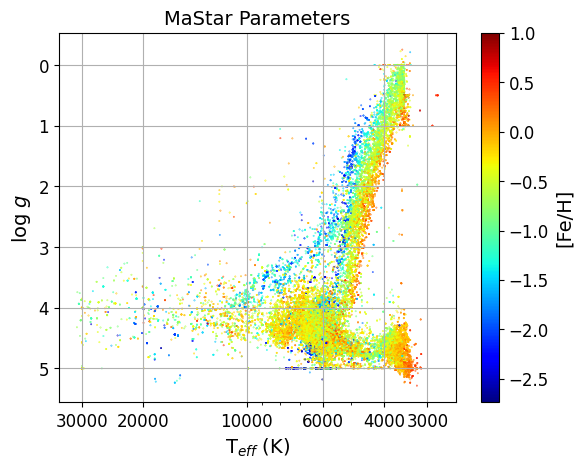

In [36]:
# Plotting
scatter = plt.scatter(x='teff', y='logg', c='feh', cmap='jet', data=mastar_df, s=0.1)

# Reverse the x-axis and y-axis
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xscale('log')

# Customize the plot
plt.title('MaStar Parameters')
plt.xlabel('T$_{eff}$ (K)')
plt.ylabel('log $g$')
custom_ticks = [30000, 20000, 10000, 6000, 4000, 3000]
plt.xticks(custom_ticks, custom_ticks)
plt.grid(True)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('[Fe/H]')

# Save the plot as a PDF file
plt.savefig('mastar_params.pdf');

# Class distribution plots

In [18]:
# conditions for teff classification
cond_teff = [
    (mastar_df.teff < 3500),
    (mastar_df.teff >= 3500) & (mastar_df.teff < 5000),
    (mastar_df.teff >= 5000) & (mastar_df.teff < 6000),
    (mastar_df.teff >= 6000) & (mastar_df.teff < 7500),
    (mastar_df.teff >= 7500) & (mastar_df.teff < 10000),
    (mastar_df.teff >= 10000) & (mastar_df.teff < 25000),
    (mastar_df.teff >= 25000)
]

classes_teff = ['M', 'K', 'G', 'F', 'A', 'B', 'O']
# ordinal encoding since they represent increasing temperatures
classes_teff_encoded = np.arange(len(classes_teff))

# create new teff columns
mastar_df['teff_class'] = np.select(cond_teff, classes_teff, default='black')
mastar_df['teff_label'] = np.select(cond_teff, classes_teff_encoded, default='black')

In [19]:
# conditions for logg classification
cond_logg = [
    (mastar_df.logg < 2),
    (mastar_df.logg >= 2) & (mastar_df.logg < 3),
    (mastar_df.logg >= 3) & (mastar_df.logg < 3.5),
    (mastar_df.logg >= 3.5) & (mastar_df.logg < 4),
    (mastar_df.logg >= 4) & (mastar_df.logg < 4.5),
    (mastar_df.logg >= 4.5)
]

# ordinal encoding since they represent increasing log g
classes_logg_encoded = np.arange(len(cond_logg))

# create new log g column
mastar_df['logg_label'] = np.select(cond_logg, classes_logg_encoded, default='black')

In [20]:
# conditions for feh classification
cond_feh = [
    (mastar_df.feh < -2),
    (mastar_df.feh >= -2) & (mastar_df.feh < -1),
    (mastar_df.feh >= -1) & (mastar_df.feh < 0),
    (mastar_df.feh >= 0)
]

classes_feh = ['XMP', 'MP', 'MR', 'XMR']
# ordinal encoding since they represent increasing [Fe/H]
classes_feh_encoded = np.arange(len(cond_feh))

# create new [Fe/H] column
mastar_df['feh_class'] = np.select(cond_feh, classes_feh, default='black')
mastar_df['feh_label'] = np.select(cond_feh, classes_feh_encoded, default='black')

In [73]:
plt.rcParams.update({
    'axes.titlesize': 20,     # Title font size
    'axes.labelsize': 20,     # X and Y axis labels font size
    'xtick.labelsize': 16,    # X tick labels font size
    'ytick.labelsize': 16,    # Y tick labels font size
    'legend.fontsize': 16,    # Legend font size
    'figure.titlesize': 20    # Figure title font size
})

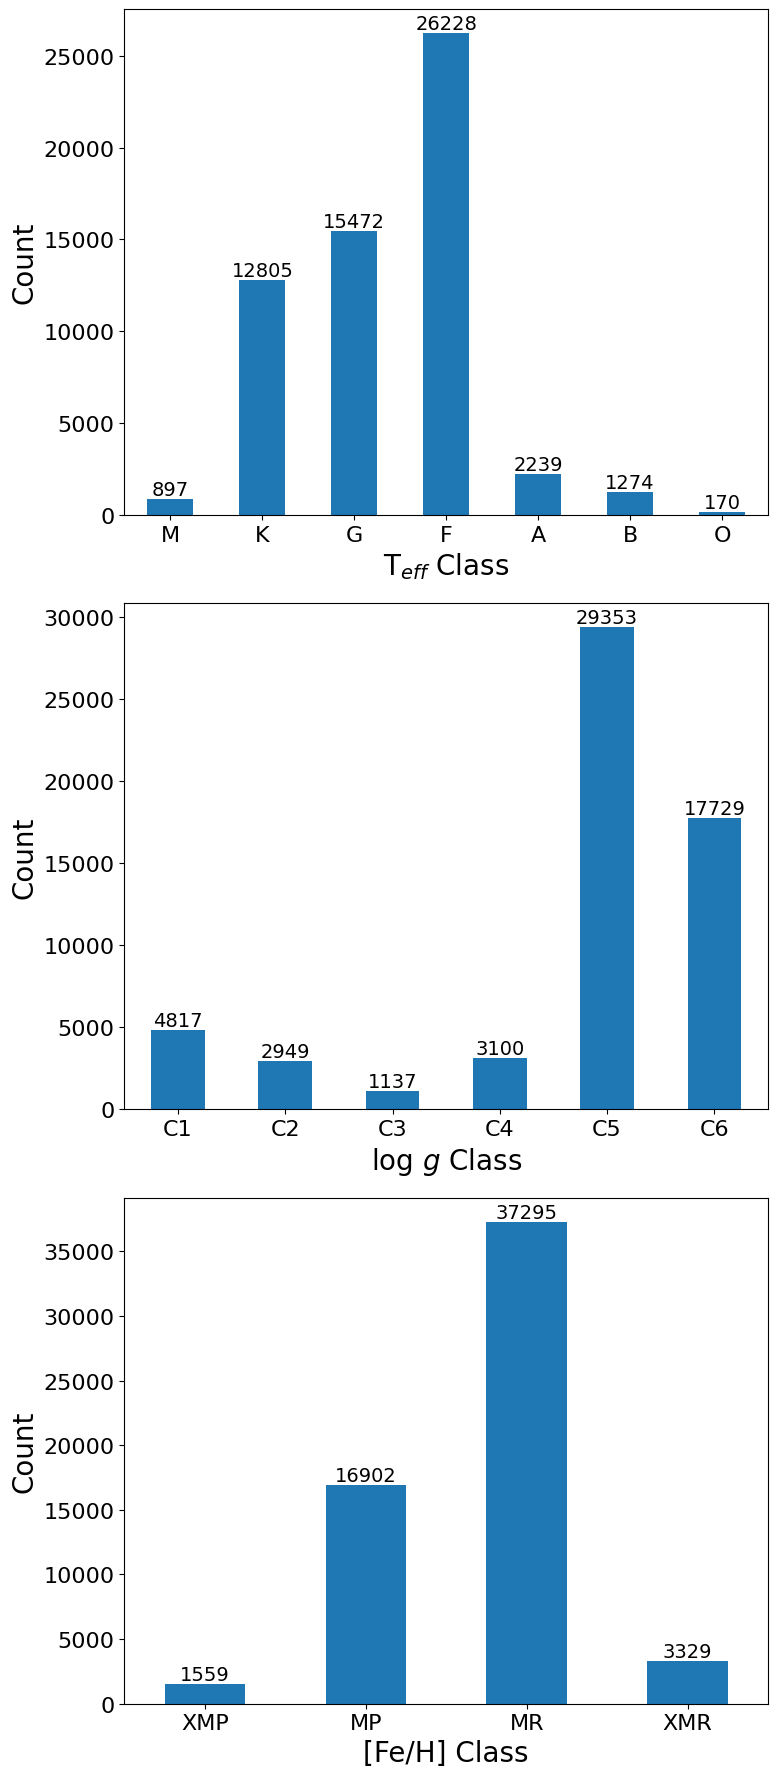

In [74]:
# Create a figure and three subplots in one column
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8,18))

# Plot on the first subplot
mastar_df.teff_class.value_counts().loc[classes_teff].plot.bar(ax=ax1)
ax1.bar_label(ax1.containers[0])
ax1.set_xticklabels(classes_teff, rotation=0)
ax1.set_xlabel('T$_{eff}$ Class')
ax1.set_ylabel('Count')

# Plot on the second subplot
mastar_df.logg_label.value_counts().sort_index().plot.bar(ax=ax2)
ax2.bar_label(ax2.containers[0])

logg_xticks = ['C'+str(c+1) for c in classes_logg_encoded]
ax2.set_xticklabels(logg_xticks, rotation=0)
ax2.set_xlabel('log $g$ Class')
ax2.set_ylabel('Count')

# Plot on the third subplot
mastar_df.feh_class.value_counts().loc[classes_feh].plot.bar(ax=ax3)
ax3.bar_label(ax3.containers[0])
ax3.set_xticklabels(classes_feh, rotation=0)
ax3.set_xlabel('[Fe/H] Class')
ax3.set_ylabel('Count')

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Save the plot as a PDF file
plt.savefig('class_distros.pdf');

# Sample spectra plots

In [22]:
mastar_df.teff_label = pd.to_numeric(mastar_df.teff_label)
mastar_df.logg_label = pd.to_numeric(mastar_df.logg_label)
mastar_df.feh_label = pd.to_numeric(mastar_df.feh_label)

In [23]:
mastar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59085 entries, 0 to 59084
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   manga_id    59085 non-null  object 
 1   teff        59085 non-null  float64
 2   teff_err    59085 non-null  float64
 3   logg        59085 non-null  float64
 4   logg_err    59085 non-null  float64
 5   feh         59085 non-null  float64
 6   feh_err     59085 non-null  float64
 7   flux        59085 non-null  object 
 8   s2n         59085 non-null  float64
 9   teff_class  59085 non-null  object 
 10  teff_label  59085 non-null  int64  
 11  logg_label  59085 non-null  int64  
 12  feh_class   59085 non-null  object 
 13  feh_label   59085 non-null  int64  
dtypes: float64(7), int64(3), object(4)
memory usage: 6.3+ MB


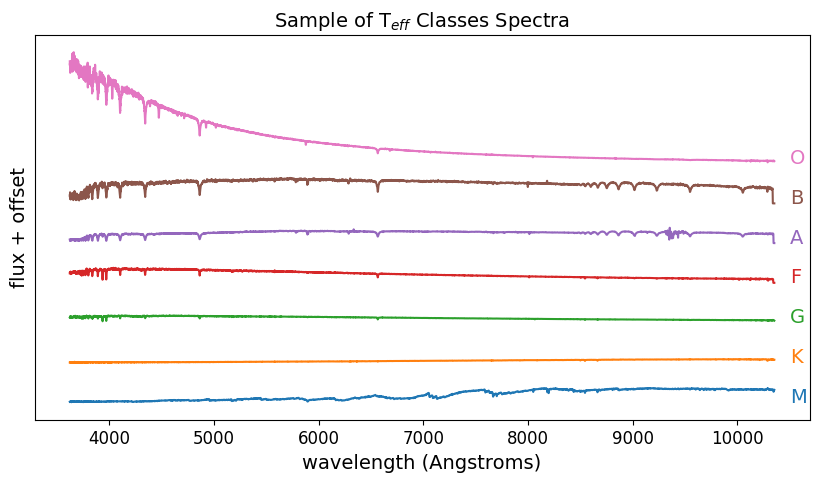

In [44]:
# Create a figure and axis
plt.figure(figsize=(10, 5))

# Plot a sample of flux for each teff class
for i_class in range(len(cond_teff)):
    i = mastar_df[mastar_df['teff_label'] == i_class]['flux'].iloc[4]
    l = plt.plot(wl, i + 650 * i_class, label=classes_teff[i_class])
    c = l[0].get_color()
    plt.text(10500, 650 * i_class, classes_teff[i_class], color=c)
    

# Set labels and title
plt.yticks([])
plt.xlabel('wavelength (Angstroms)')
plt.ylabel('flux + offset')
plt.title('Sample of T$_{eff}$ Classes Spectra');

In [76]:
plt.rcParams.update({
    'axes.titlesize': 33,     # Title font size
    'axes.labelsize': 33,     # X and Y axis labels font size
    'xtick.labelsize': 30,    # X tick labels font size
    'ytick.labelsize': 30,    # Y tick labels font size
    'legend.fontsize': 30,    # Legend font size
    'figure.titlesize': 33    # Figure title font size
})

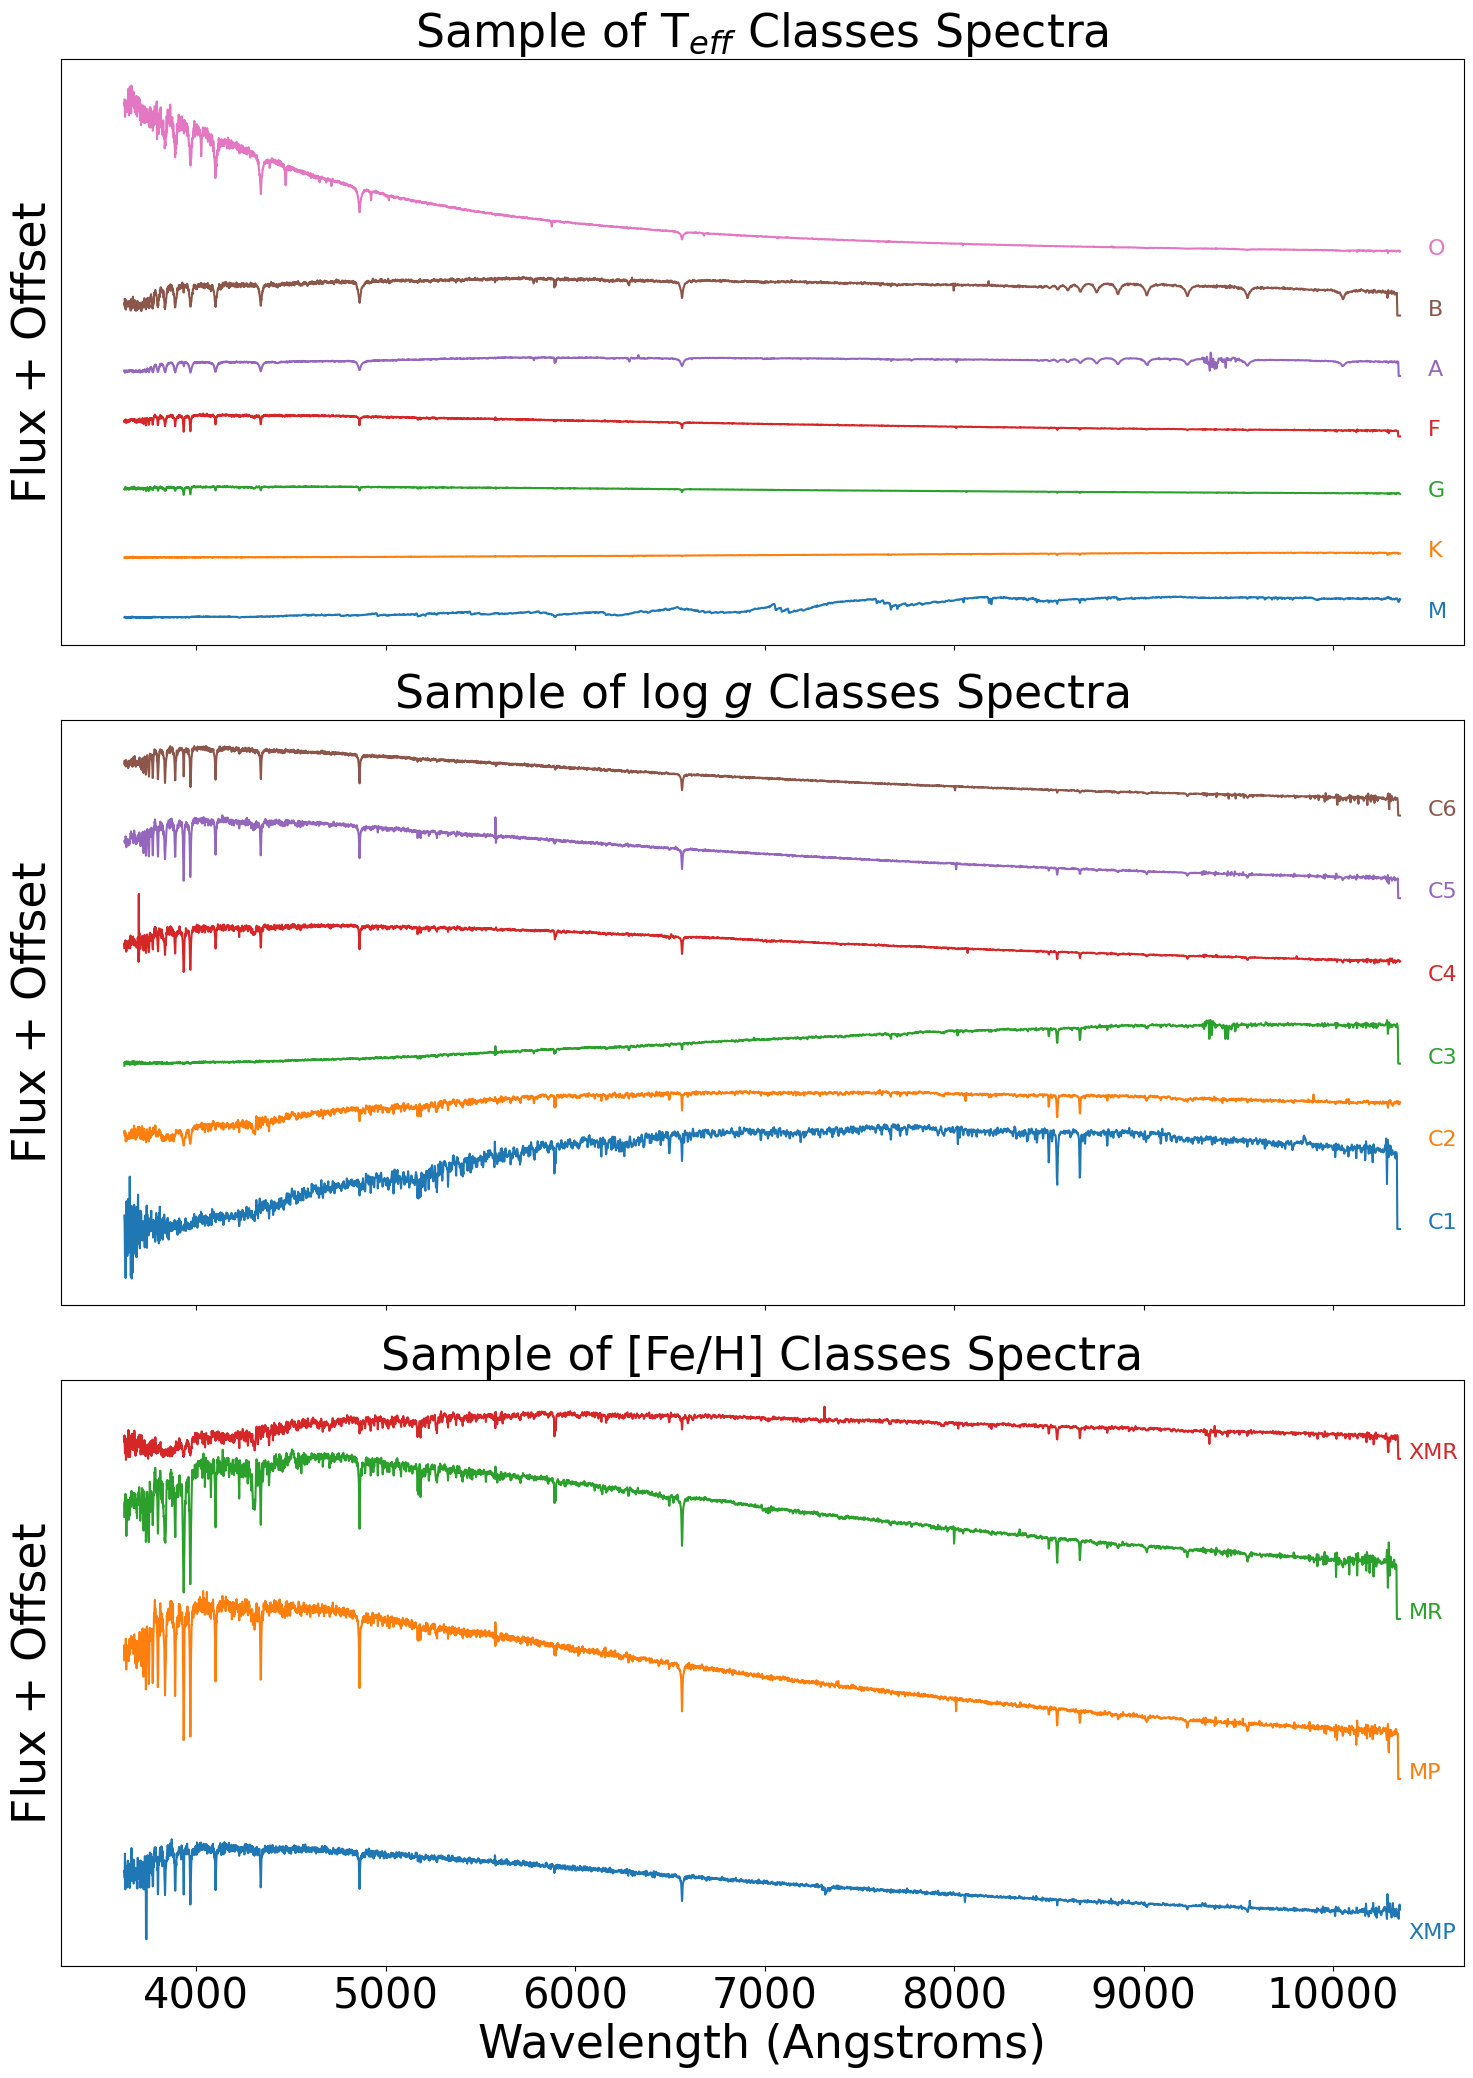

In [85]:
# Create a figure and three subplots in one column
fig, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize=(15, 21), sharex=True)

# Plot a sample of flux for each teff class
for i_class in range(len(classes_teff)):
    i = mastar_df[mastar_df['teff_label'] == i_class]['flux'].iloc[4]
    l = ax1.plot(wl, i + 650 * i_class)
    c = l[0].get_color()
    # Add text label
    ax1.text(10500, 650 * i_class, classes_teff[i_class], color=c, fontsize=16)

    # Customize subplot
    ax1.set_yticks([])
    ax1.set_ylabel('Flux + Offset')
    ax1.set_title('Sample of T$_{eff}$ Classes Spectra')

# Plot a sample of flux for each logg class
for i_class in range(len(cond_logg)):
    i = mastar_df[mastar_df['logg_label'] == i_class]['flux'].iloc[3]
    l = ax2.plot(wl, i + 250 * i_class)
    c = l[0].get_color()
    # Add text label
    ax2.text(10500, 250 * i_class, 'C'+str(i_class+1), color=c, fontsize=16)

    # Customize subplot
    ax2.set_yticks([])
    ax2.set_ylabel('Flux + Offset')
    ax2.set_title('Sample of log $g$ Classes Spectra')
    
# Plot a sample of flux for each feh class
for i_class in range(len(classes_feh)):
    i = mastar_df[mastar_df['feh_label'] == i_class]['flux'].iloc[4]
    l = ax3.plot(wl, i + 210 * i_class)
    c = l[0].get_color()
    # Add text label
    ax3.text(10400, 210 * i_class, classes_feh[i_class], color=c, fontsize=16)

    # Customize subplot
    ax3.set_yticks([])
    ax3.set_ylabel('Flux + Offset')
    ax3.set_title('Sample of [Fe/H] Classes Spectra')

plt.xlabel('Wavelength (Angstroms)')
# Adjust layout
plt.tight_layout()

# Save the plot as a PDF file
plt.savefig('sample_spectra.pdf');

In [26]:
# Save data in pickle file
import pickle as pkl

file_data = {'wavelength': wl, 'df': mastar_df}
file_name = 'sec2_data_output.pkl'
with open(file_name, 'wb') as f:
    pkl.dump(file_data, f, protocol=pkl.HIGHEST_PROTOCOL)
    
print('Data saved in file ' + file_name)

Data saved in file sec2_data_output.pkl
